This notebook compares the performance of different distributed estimation algorithms :<br>
KCF (Kalman Consensus Filter, 2007)<br>
ICF (Information Consensus Filter, 2013)<br>

In [1]:
import os
import settings.input

# Choose target and sensor-network
input_files = []
input_files.append(os.path.join("settings","json_files", "target-rotating.json"))
input_files.append(os.path.join("settings","json_files", "test-network-1.json"))

# Read input files
input_data = settings.input.read(input_files)

Consider a network of sensors connected as,

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


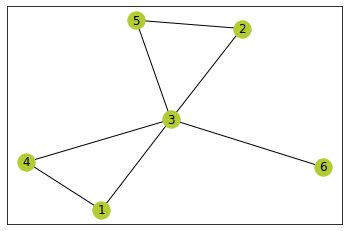

In [2]:
from sim.helpers import show_graph
show_graph(input_data["network"]["adjacency"])

Consider the scenario where sensors `'1'`, `3` and `4` have high estimation error; We expect this to cause poor performance at sensor `'3'`, for distributed estimation protocols that do not weight their neighbors' information (such as the Kalman Consensus Filter). 

In [3]:
input_data["network"]["noise_covariances"]["1"] = [[10000, 0], [0, 10000]]
input_data["network"]["noise_covariances"]["3"] = [[10000, 0], [0, 10000]]
input_data["network"]["noise_covariances"]["4"] = [[10000, 0], [0, 10000]]

Consider a target moving in circles (with system noise) being observed by our sensor network. <br>
We compare the performance of KCF (Kalman Consensus Filter) & ICF (Information Consensus Filter) :

In [ ]:
from sim.simulation import simulate_many
sensor_initials = {"estimate_prior": [[100], [40]],
                   "ErrCov_prior": [[50,0],[0,50]]}

results = simulate_many(input_data, duration = 3, est_schemes=["KCF"], 
                        sensor_initials=sensor_initials)
print("KCF Scheme (Poor performance) : ")
results[0].plot_xy(target=True, estimates_of="3")
# print("ICF Scheme (Better performance) : ")
# results[1].plot_xy(target=True, estimates_of="3")

Initializing a sensor network with KCF (2009) scheme...
> /Users/shiraz/repos/sensor-network-sim/sim/simulation.py(48)simulate_many()
-> print(f"Simulating for {duration} time-steps...")
(Pdb) test = networks[-1].sensors[0]
*** KeyError: 0
(Pdb) test = networks[-1].sensors["1"]
(Pdb) test
(Pdb) test["ErrCov"
*** SyntaxError: unexpected EOF while parsing
(Pdb) test["ErrCov"]
array([[None, None],
       [None, None]], dtype=object)
(Pdb) test.__dict__
{'id': '1', 'neighbors': ['3', '4'], 'Obs': array([[1, 0],
       [0, 1]]), 'NoiseCov': array([[10000,     0],
       [    0, 10000]]), 'measurement': array([[None],
       [None]], dtype=object), 'noise': <sim.noise.Noise object at 0x11e384950>, 'estimate': array([[None],
       [None]], dtype=object), 'ErrCov': array([[None, None],
       [None, None]], dtype=object), 'estimate_prior': array([[100],
       [ 40]]), 'ErrCov_prior': array([[50,  0],
       [ 0, 50]]), 'K_gain': None, 'C_gain': {'3': None, '4': None}, 'eps': 0.25}
(Pdb) dir(

In [5]:
###### Estimated Error Covariance
# print("Estimated Error Covariance of sensor 3, using KCF :")
# results[0].plot_timeseries(ErrCov_of="3")
# print("Estimated Error Covariance of sensor 3, using ICF :")
# results[1].plot_timeseries(ErrCov_of="3")

Since the sensor network operates via its own classobjects, we can simulate two estimation schemes concurrently and compare their performances. <br>
To simulate a single estimation scheme, use `sim.simulation.simulate`.